python | keras | scikit-learn
--- | --- | ---
![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png) | ![Keras Logo](https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2017/08/Keras_Logo_358x230-179x115.png) | ![scikit_learn_logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# Getting Started with Deep Learning using Keras and Python
### Mike Williams

### my notes, Arturo Alatriste Trujillo


## Table of Content

* [install_packages](#install_packages)
* [load_packages](#load_packages)

### [Scikit-learn](#scikit_learn)
* [explore_data](#explore_data)
* [Munge and Split the Data for Training and Testing](#split_data)
* [Train a Scikit-learn Classifier](#train)
* [Assess the Classifier Using Accuracy](#assess)

### [Keras](#keras)
* [Build the Neural Network Model](#build_nn)
* [Use the Neural Network Classifier](#use_nn)




<a id = 'install_packages'> </a>

### install packages

In [ ]:
'''
# in a Conda terminal install the libraries

conda install -c anaconda seaborn 
conda install -c conda-forge tensorflow 
conda install -c conda-forge keras 

'''

<a id = 'load_packages'> </a>

### load_packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import pandas            as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model     import LogisticRegressionCV

from keras.models             import Sequential
from keras.layers.core        import Dense, Activation
from keras.utils              import np_utils


C:\aat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


<a id = 'scikit_learn'> </a>

## Sckit-Learn

<a id = 'explore_data'> </a>

### explore data

dataset has 4 columns for features:
* sepal_length
* sepalwidth
* petal_length
* petal_width

and one column for the class of the flower. There are only 3 accepted values:
* Iris-setosa
* Iris-versicolor
* Iris-virginica

In [2]:
iris = pd.read_csv( 'C:/aat/data/iris_header.csv' )
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


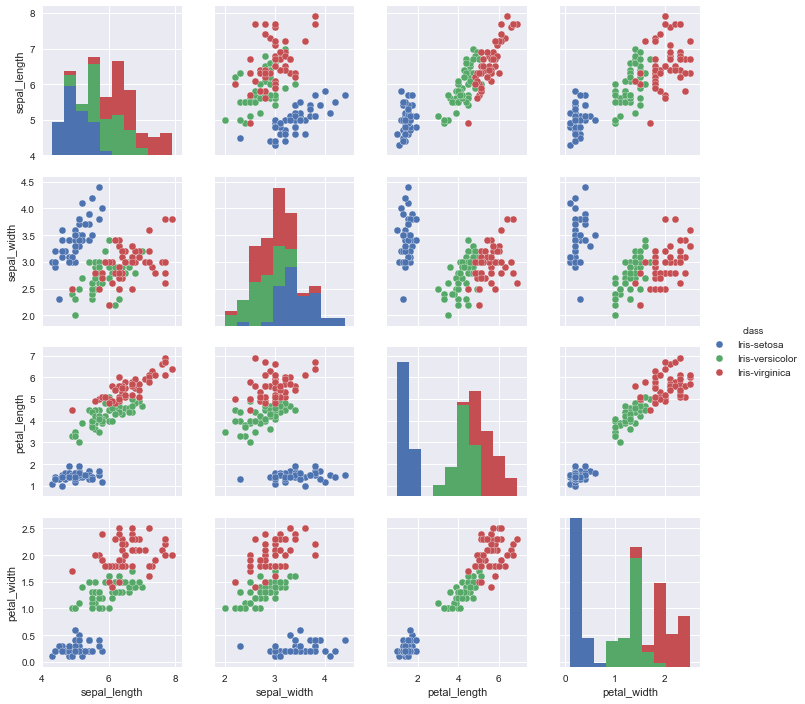

In [3]:
sns.pairplot( iris, hue = 'class' )

<a id = 'split_data'> </a>

### Munge and Split the Data for Training and Testing

In [4]:
# petal and sepal data
X = iris.values[ :, :4 ]

# class of flower
y = iris.values[ :,  4 ]

#### print first row

In [7]:
print ( 'sepal_length, sepal_width, petal_length, petal_width' )
print( X[0] )

print( '\n class ' )
print( y[0] )

sepal_length, sepal_width, petal_length, petal_width
[5.1 3.5 1.4 0.2]

 class 
Iris-setosa


In [9]:
train_X, test_X, train_y, test_y = train_test_split( \
 X, y, train_size=0.5, random_state=0 )

In [10]:
print( 'Var \t train \t test' ) 
print( '--- \t ------\t----------' ) 
print( 'X\t{0}\t{0}'.format( train_X.shape, test_X.shape ) )
print( 'Y\t{0} \t{0}'.format( train_y.shape, test_y.shape ) )

Var 	 train 	 test
--- 	 ------	----------
X	(75, 4)	(75, 4)
Y	(75,) 	(75,)


<a id = 'train'> </a>

### Train a Scikit-learn Classifier

In [11]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

<a id = 'assess'> </a>

### Assess the Classifier Using Accuracy

In [12]:
print( "Accuracy = {:.2f}".format( lr.score( test_X, test_y ) ) )

Accuracy = 0.83


<a id = 'keras'> </a>

## Keras

In [8]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array( train_y )
test_y_ohe  = one_hot_encode_object_array( test_y  )

<a id = 'build_nn'> </a>

### Build the Neural Network Model

In [12]:
# model can be Sequential or Computational Graph.
model = Sequential()

In [14]:
# we have 4 features, so we have 4 input neurons.
# and a hidden layer of 16 neurons.

model.add( Dense(16, input_shape=(4,)))
model.add( Activation('sigmoid') )


In [15]:
# we have 3 class of flowers, so we have 3 output neurons

model.add( Dense(3) )
model.add( Activation('softmax') )

In [16]:
model.compile(                            \
  optimizer = 'adam',                     \
  loss      = 'categorical_crossentropy', \
  metrics   = ["accuracy"] )

<a id = 'use_nn'> </a>

### Use the Neural Network Classifier

In [19]:
# train
model.fit( train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0 );

In [21]:
# test
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97


### references

Irish Flowers Dataset
* http://archive.ics.uci.edu/ml/datasets/Iris